In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import mean_squared_error

In [2]:
X, y = load_breast_cancer(return_X_y=True)
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [3]:
def hypothesis(theta, X):
    hx = theta[0]
    for i in range(X.shape[1]-1):
        hx += theta[i + 1] * X[:, i]
    return 1.0 / (1.0 + np.exp(-hx))
def cost_func(theta, X, y):
    hx = hypothesis(theta, X)
    return (-y * np.log(hx) - (1-y) * np.log(1-hx))

In [4]:
m = len(X)
def gradient_descent(theta, X, y, alpha):
    cost=[]
    i=0
    while i<2000:
        hx = hypothesis(theta, X)
        hx = hx.reshape(569,1)
        theta[0] -= alpha*(1/m)* np.sum(hx - y)
        theta[1] -= alpha*(1/m)* np.sum((hx - y)*X)
        cost.append(cost_func(theta, X, y))
        i+=1
    return cost, theta

In [5]:
def predict(theta, X, y, alpha):
    cost, theta = gradient_descent(theta, X, y, alpha)
    return hypothesis(theta, X), cost, theta

In [6]:
theta = np.zeros(30)
y = y.reshape(569, 1)
pred, cost, theta = predict(theta, X, y, 0.0003)
pred = np.where(pred>=0.65, 0, pred)
pred = np.where(pred!=0, 1, pred)
y = y.reshape(569)
pred

array([0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1.

(array([  1.,   0.,   0.,   0.,   0., 462.,   0.,   0.,   0., 106.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

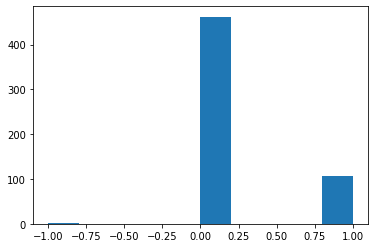

In [7]:
diff = pred - y
plt.hist(diff)

(569, 30) (569,) (569,)


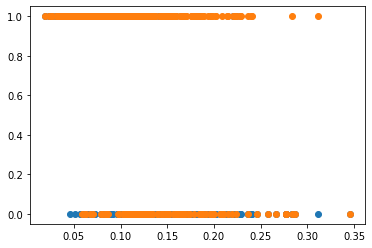

In [8]:
print(X.shape, y.shape, pred.shape)
plt.scatter(X[:,5], y)
plt.scatter(X[:,5], pred)

In [9]:
mean_squared_error(y, pred) ** 0.5

0.4336464102685967